In [1]:
import pandas as pd
df=pd.read_csv('creditcard.csv')
df.head()
import numpy as np

In [2]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [3]:
success_trans = df[df.Class==0]
fraud_trans = df[df.Class==1]

In [4]:
success_trans.shape

(284315, 31)

In [5]:
legit = success_trans.sample(n=1000)

In [6]:
df = pd.concat([legit,fraud_trans],axis = 0)

In [7]:
df.shape

(1492, 31)

In [8]:
#### Independent and Dependent Features
X=df.drop("Class",axis=1)
y=df.Class

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [11]:
log_class=LogisticRegression()
log_class.fit(X_train, y_train)

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
y_pred_lr=log_class.predict(X_test)

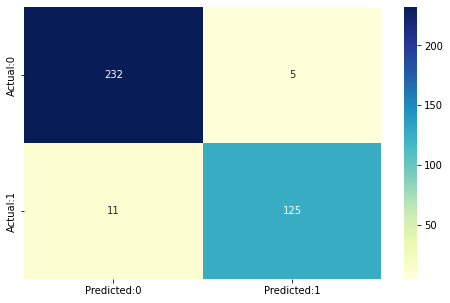

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt 
cm=confusion_matrix(y_test,y_pred_lr)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [15]:
print(accuracy_score(y_test,y_pred_lr))

0.9571045576407506


In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [17]:
y_pred_svm=clf.predict(X_test)

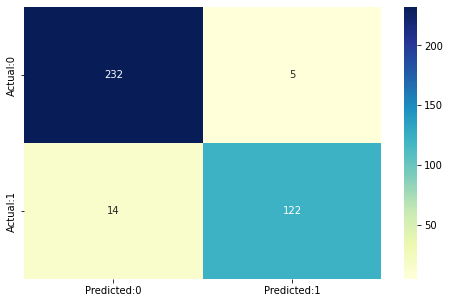

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt 
cm=confusion_matrix(y_test,y_pred_svm)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [20]:
print(accuracy_score(y_test,y_pred_svm))

0.9490616621983914
